<a href="https://www.kaggle.com/code/mahmoudhamza/gradio-blocks-italian-nlp?scriptVersionId=102005808" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Gradio blocks for multi-tab app

**Aim:** This notebook aims to discover the capabilities of gradio blocks for building multi-tab application. In addition, it will serve as the base for creating a huggingface space that will share the results of trieste omdena project. Results range from sentiment analysis, word frequency and topic modeling.   

This won't be a regular blog, it will be like Q&A and how I tried to troubleshoot the problems I faced

## what was the main challenge?

Omdena competition, link to be added, was a little bit different. Results were mainly either descriptive statistics or direct model inferences (sentiment analysis using huggingface [pipelines](https://huggingface.co/docs/transformers/main_classes/pipelines)) or unsupervised learning (topic modeling). The question is: will gradio be able to help here? Or is it just a pipe that connects inputs added by users through a function to display outputs? can gradio help in the static situation I am facing?  

The answer is in gradio [blocks](https://gradio.app/introduction_to_blocks/). I think it is released in version 3.0 and it extends the functionalities of gradio by building a block at a time. Previously gradio was advertised as the go-to when you want to build a quick ML demo in no time. If you want anything more advanced, streamlit has got your back. With gradio blocks, gradio has started a pradigm shift. Now you can build more complex multi-step apps. However, I currently don't have enough experience to compare between the gradio and streamlit. 

**Q1 for experienced readers - how to choose between gradio and streamlit?**

## Did gradio work for me? 
> Yes, but I faced some challenges. However, the multi-tab feature in gradio is quite useful 

I had lots of plots to display. Plots not images. Thus, I headed to this [section])(https://gradio.app/docs/#plot) in the documentation and I realized that not all plotting libraries are supported. I can only use any of these: 
{matplotlib.figure.Figure}, a {plotly.graph_objects._figure.Figure}, or a {dict} corresponding to a bokeh plot (json_item format)

OK, that's not too bad. I can use matplotlib. However, it seems that it is refusing matplotlib plots. It is saying that it can't accept an axis object. This means that's time for some refreshment and clearing of confusion. Bex's [blog](https://towardsdatascience.com/clearing-the-confusion-once-and-for-all-fig-ax-plt-subplots-b122bb7783ca) is awesome here. Thus, I needed to have the figure object, not the axis. With few subplots and a dozen of lines, I could handle this. Streamlit could handle much more plotting libraries by the way. 

Side note: I struggled with a bug related to matplotlib figures even after modification. It was a bug and it was solved in the recent gradio version.  

wc_fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)

wc_fig.tight_layout()

ax1.imshow(sad_wordcloud, interpolation="bilinear")

ax1.axis("off")

ax1.set_title('Sadness', {'fontsize': 30})


ax2.imshow(joy_wordcloud, interpolation="bilinear")

ax2.axis("off")

ax2.set_title('Joy', {'fontsize': 30})


ax3.imshow(fear_wordcloud, interpolation="bilinear")

ax3.axis("off")

ax3.set_title('Fear', {'fontsize': 30})


ax4.imshow(anger_wordcloud, interpolation="bilinear")

ax4.axis("off")

ax4.set_title('Anger', {'fontsize': 30})


plt.show()

# Ofcourse I could have used a loop but it seems that I haven't used matplotlib in a while :) 

## How to share your gradio app on huggingface spaces? 

That was the easy part. [Spaces docs](https://huggingface.co/docs/hub/spaces-overview) has got your back. 
You just create a space just like a github repo. You then clone it, add your files to it and add the requirements.txt(the text file having all your installations.) 
and then git add, commit and push as usual. 

What about the data I am working on? Will I upload it via git add? It's large and this doesn't seem to be good. 
I can use LFS as I described [here](https://www.kaggle.com/code/mahmoudhamza/tips-for-huggingface-spaces). However, there is even an easier way. You can use [huggingface datasets](https://huggingface.co/docs/datasets/index) directly. You will just create the dataset from [here](https://huggingface.co/new-dataset), describe your dataset for other users or your future self and finally upload your data via GIU. git LFS will be done automatically. Your large dataset will be uploaded in no time. 

## What about using the dataset after uploading it? 
> I am not familar with dataset library and I just love pandas

dataset = load_dataset("Santarabantoosoo/italian_long_covid_tweets")
data = pd.DataFrame.from_dict(dataset["train"])

Yes! That's all you need. But I didn't create a dictionary nor I have splitted the data into train and test. This has been created for you. All your data has been stored in this dictionary with a single key - train. Your pandas dataframe is ready sir :) 

A very nice [guide](https://huggingface.co/blog/streamlit-spaces) is offered by Merve. It is using streamlit not gradio, however, it is emphasizing the power of huggingface hub

## Tips and tricks for gradio blocks

To be continued .. 

In [1]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.9/212.9 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.8/84.8 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.4/68.4 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 33.0 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4712 sha256=2f3b6ba8dbdb89c24f781cbd80d50d2f806ddf67afb054f8af9cbe334b63714d
  Stored in directory: /root/.cache/pip/wheels/13/e4/6c/e8059816e86796a597c6e6b0d4c880630f51a1fcfa0befd5e6
  Created wheel 

In [2]:
import gradio as gr 
import pandas as pd 
import numpy as np 

## Full code

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/Santarabantoosoo--italian_long_covid_tweets-9f5161da1cb62255/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

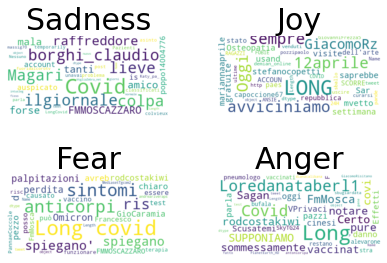

Running on local URL:  http://127.0.0.1:7860/

To create a public link, set `share=True` in `launch()`.


In [3]:
import gradio as gr 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
from stop_words import get_stop_words
from wordcloud import WordCloud
from datasets import load_dataset


## import data 

dataset = load_dataset("Santarabantoosoo/italian_long_covid_tweets")
data = pd.DataFrame.from_dict(dataset["train"])

# formulate a wordcloud for each emotion

stop = get_stop_words('italian')

# Wordcloud with anger tweets
angry_tweets = data['tweet'][data["emotion"] == 'anger']
stop_words = ["https", "co", "RT"] + list(stop)
anger_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white", stopwords = stop_words).generate(str(angry_tweets))

# Wordcloud with sad tweets
sad_tweets = data['tweet'][data["emotion"] == 'sadness']
stop_words = ["https", "co", "RT"] + list(stop)
sad_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white", stopwords = stop_words).generate(str(sad_tweets))

 # Wordcloud with joy tweets
joy_tweets = data['tweet'][data["emotion"] == 'joy']
stop_words = ["https", "co", "RT"] + list(stop)
joy_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white", stopwords = stop_words).generate(str(joy_tweets))


 # Wordcloud with fear tweets
fear_tweets = data['tweet'][data["emotion"] == 'fear']
stop_words = ["https", "co", "RT"] + list(stop)
fear_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white", stopwords = stop_words).generate(str(fear_tweets))

# combine wordclouds in a single matplotlib figure

wc_fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)

wc_fig.tight_layout()

ax1.imshow(sad_wordcloud, interpolation="bilinear")

ax1.axis("off")

ax1.set_title('Sadness', {'fontsize': 30})


ax2.imshow(joy_wordcloud, interpolation="bilinear")

ax2.axis("off")

ax2.set_title('Joy', {'fontsize': 30})


ax3.imshow(fear_wordcloud, interpolation="bilinear")

ax3.axis("off")

ax3.set_title('Fear', {'fontsize': 30})


ax4.imshow(anger_wordcloud, interpolation="bilinear")

ax4.axis("off")

ax4.set_title('Anger', {'fontsize': 30})


plt.show()

# plot a pie plot for emotions' distribution 

number_tweets_per_day = data.groupby(['date', 'emotion']).agg({'id': 'count'}).reset_index()

number_tweets_per_day["tweet_date"] = pd.to_datetime(number_tweets_per_day["date"])

time_fig = px.line(number_tweets_per_day, x = 'tweet_date', y = 'id', labels = {'id': 'count'}, color = 'emotion', 
                  color_discrete_sequence=px.colors.qualitative.G10)

# create a lineplot for emotions 

sentiment_counts = data.groupby('emotion').agg({'id' : 'size'}).reset_index()
sentiment_counts.rename(columns = {'id':'count'}, inplace = True)
sent_fig = px.pie(sentiment_counts, values='count', names='emotion', title='Tweets within each emotion', labels = {'id': 'count'}, 
                 color_discrete_sequence=px.colors.qualitative.G10)
sent_fig


def display_plot(image_choice):
    
    if image_choice == 'Sentiment distribution':
        return sent_fig
    
    elif image_choice == 'Time series':
        return time_fig
    
    elif image_choice == 'Word clouds':
        return wc_fig
    
    
with gr.Blocks() as demo:
    gr.Markdown("## Choose your adventure")
    with gr.Tabs():
        with gr.TabItem("Sentiment analysis"):
            text_input =  [gr.Radio(choices = ['Sentiment distribution', 'Word clouds', 'Time series'], label = 'Choose ur plot')]
            plot_output = gr.Plot()
            text_button = gr.Button("Submit")
            
            text_button.click(display_plot, inputs=text_input, outputs=plot_output)

        with gr.TabItem("Word frequency"):
            gr.Markdown("Nothing here yet")
            
        with gr.TabItem("Topic modeling"):
            gr.Markdown("Nothing here yet")
            
            
demo.launch();

## Dataset 
> Download [here](https://huggingface.co/spaces/Santarabantoosoo/Sentiments_topic_modeling_ITALIAN)

## Full app hosted on huggingface spaces, along with the code
> [Here](https://huggingface.co/spaces/Santarabantoosoo/Sentiments_topic_modeling_ITALIAN). However, still under progress